# DecisionTreeRegressor


**Decision Tree Regressor**는 의사결정 트리(Decision Tree) 알고리즘을 사용한 회귀 모델이다.


주어진 데이터의 특성(feature)을 분할하면서, 각 분할 지점에서 특정 기준(일반적으로 평균 제곱 오차, MSE)을 최소화하도록 학습한다.


트리의 각 분할 지점에서 데이터는 여러 분기로 나뉘며, 각 분기는 특정 조건에 따라 데이터를 두 개의 하위 집합으로 나눈다. 이러한 과정을 반복하면서 트리는 점차 깊어지고, **최종적으로 각 리프 노드에 평균값을 계산해 이후 예측값으로 사용한다.**


- **장점**: 단순하고 해석이 용이하며, 비선형 관계에서도 높은 성능을 보인다.
- **단점**: 과적합(Overfitting)되기 쉬우며, 데이터의 작은 변화에도 민감하게 반응한다.




**예측과정**
1. 입력 데이터를 루트 노드에서 시작하여 트리를 따라 내려감
2. 각 노드에서 조건(feature, threshold)에 따라 좌/우 가지 선택
3. 리프 노드에 도달하면 그 노드에 저장된 평균값을 반환
]()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택가격예측

In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing


X = housing.data
y = housing.target

housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['target'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [16]:
# 모델 학습/평가
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_reg = DecisionTreeRegressor(random_state=42, max_depth=8, criterion='squared_error')
dt_reg.fit(X_train, y_train)

print('학습셋 R^2 :', dt_reg.score(X_train, y_train))
print('평가셋 R^2 :', dt_reg.score(X_test, y_test))

print('학습셋 MSE : ', mean_squared_error(y_train, dt_reg.predict(X_train)))
print('평가셋 MSE : ', mean_squared_error(y_test, dt_reg.predict(X_test)))

학습셋 R^2 : 0.7601733883178262
평가셋 R^2 : 0.6779284983766045
학습셋 MSE :  0.32059498910401363
평가셋 MSE :  0.4220453873628258


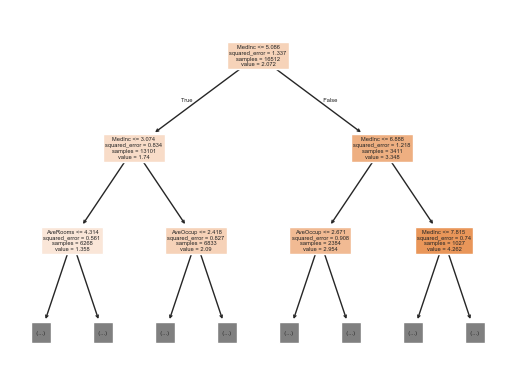

In [18]:
# 시각화
from sklearn.tree import plot_tree
plot_tree(
    dt_reg,
    filled=True,
    feature_names=housing.feature_names,
    max_depth=2
)

plt.savefig('dt_tree_california_housing.png', dpi=300, bbox_inches = 'tight')
plt.show()
